In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [20]:
df = pd.read_csv("data.csv")
df.columns.to_list()
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Features
- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower's creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower's creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
    - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
    - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
    - Y: The individual has a history of defaults on their credit file.
    - N: The individual does not have any history of defaults.
- cb_preson_cred_hist_length: The length of credit history for the individual.

## Hypothesis
• Given a factors, is it possible to predict if an individual will default on their credit?
aka target = loan_status

In [21]:
# Do EDA to understand the data
df.describe()
# have to clean person_age, person_emp_length, loan_pct_income = 0?

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [22]:
df.isnull().sum()  # <-- can we just drop these null rows?
df = df.dropna()
print(df.duplicated().sum())
df = df.drop_duplicates()

137


loan_status
0    0.782885
1    0.217115
Name: proportion, dtype: float64


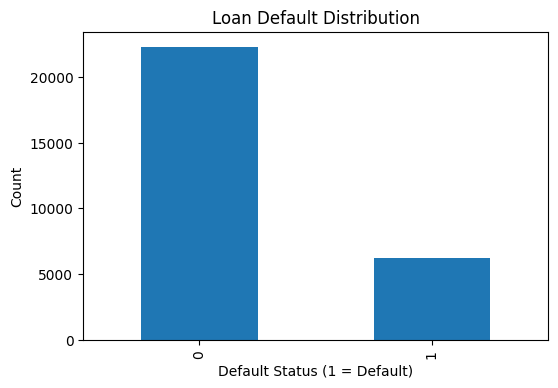

In [23]:
print(df["loan_status"].value_counts(normalize=True))
# 21% of the loans are defaulted
plt.figure(figsize=(6, 4))
df["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Default Distribution")
plt.xlabel("Default Status (1 = Default)")
plt.ylabel("Count")
plt.show()

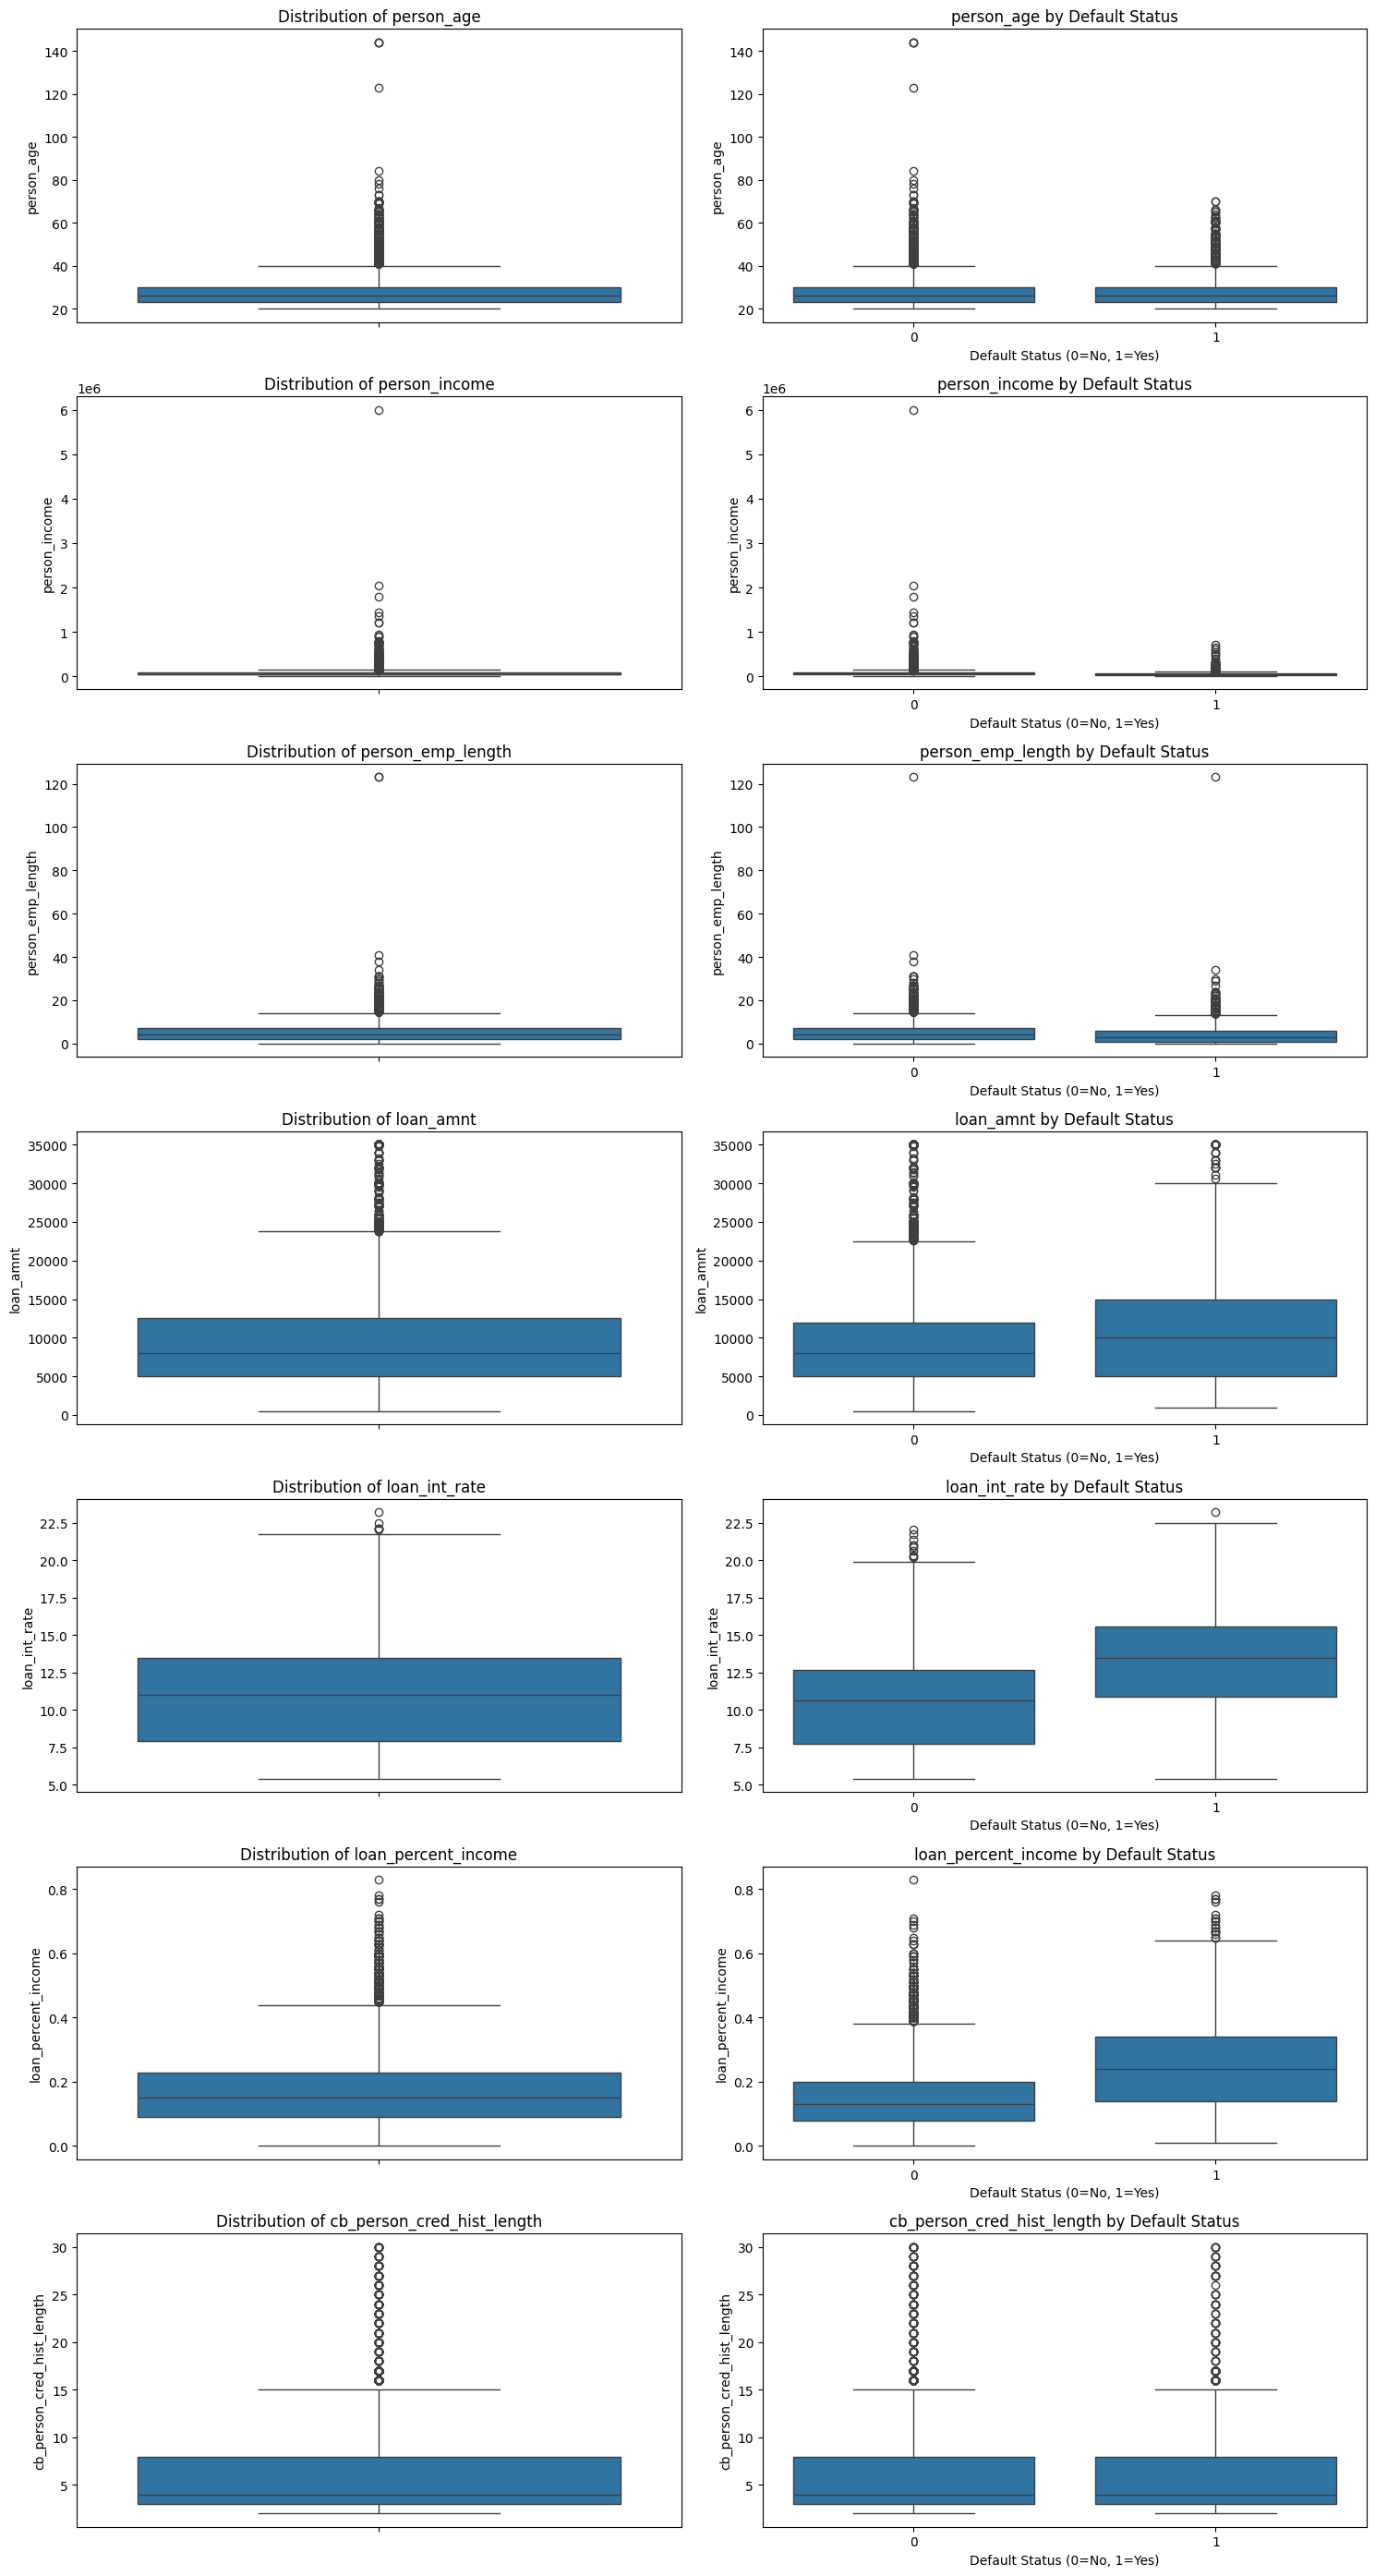

In [24]:
"""
'person_age', - Numerical
 'person_income', - Numerical
 'person_home_ownership', - Categorical
 'person_emp_length',   - Numerical
 'loan_intent', - Categorical
 'loan_grade', - Categorical
 'loan_amnt', - Numerical
 'loan_int_rate', - Numerical
 'loan_status', - Target
 'loan_percent_income',- Numerical
 'cb_person_default_on_file',- Categorical
 'cb_person_cred_hist_length'"- Numerical
"""

# Numerical features
num_features = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
]

fig, axes = plt.subplots(len(num_features), 2, figsize=(15, 4 * len(num_features)))
for i, feature in enumerate(num_features):
    # Box plot for overall distribution
    sns.boxplot(y=df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")
    axes[i, 0].set_ylabel(feature)

    # Boxplot by target
    sns.boxplot(x="loan_status", y=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f"{feature} by Default Status")
    axes[i, 1].set_xlabel("Default Status (0=No, 1=Yes)")
    axes[i, 1].set_ylabel(feature)

plt.tight_layout()
plt.show()

TODO: Clean dirty data especially age and employment length

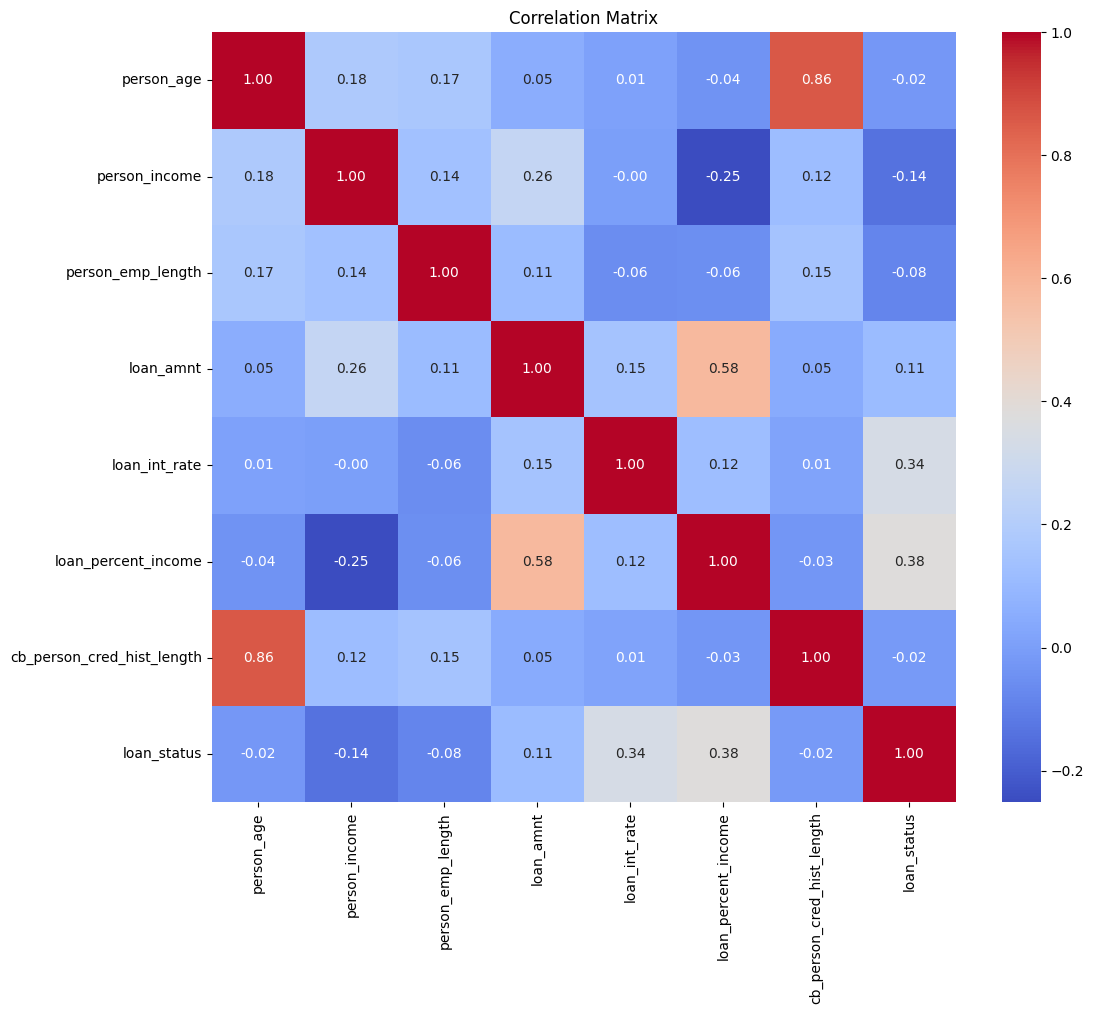

In [25]:
plt.figure(figsize=(12, 10))
corr = df[num_features + ["loan_status"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

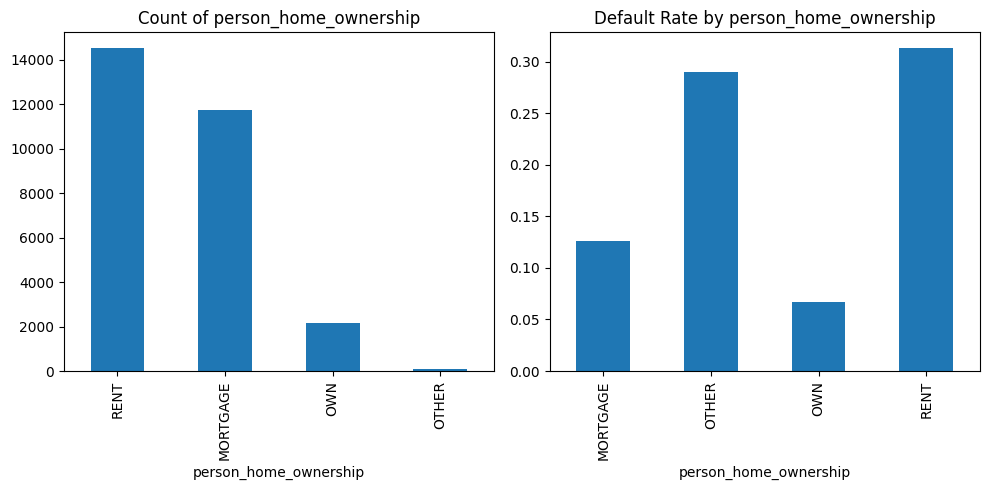

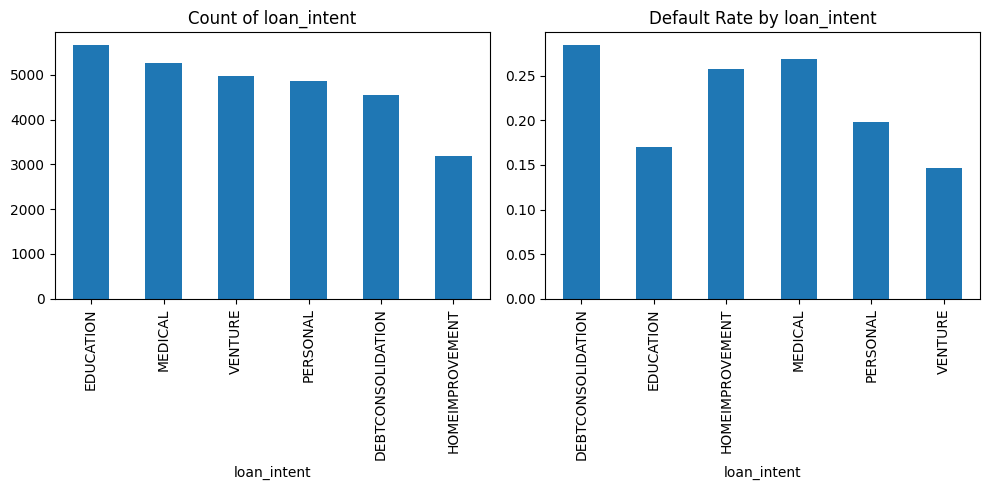

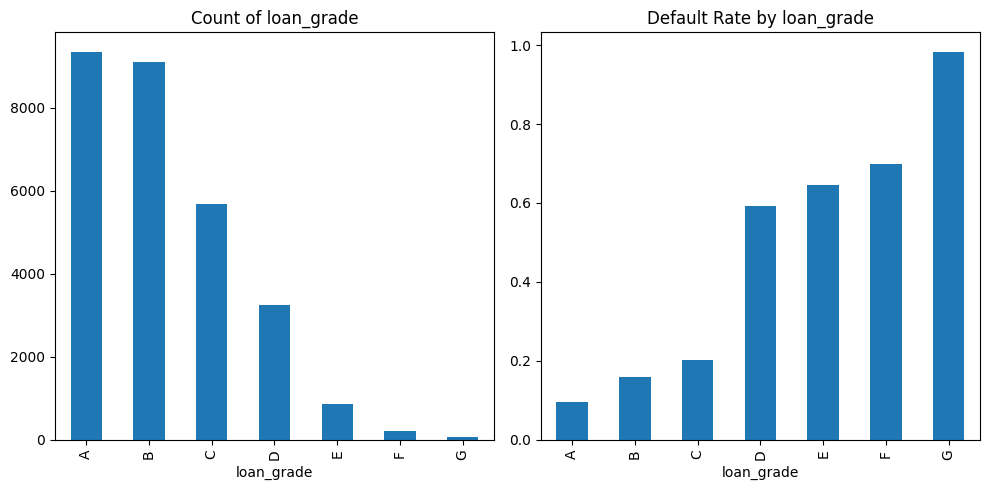

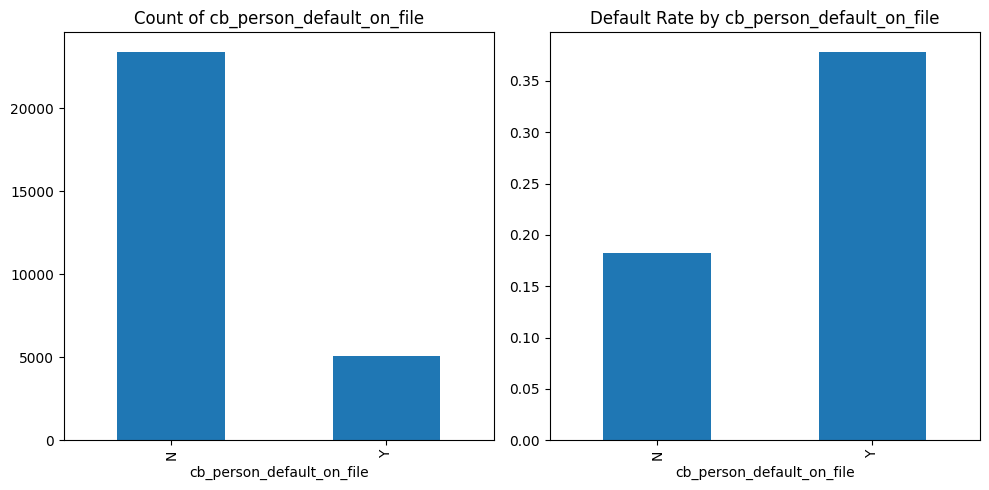

In [26]:
# categorical features visualization
cat_features = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file",
]

for feature in cat_features:
    plt.figure(figsize=(10, 5))

    # Count by category
    plt.subplot(1, 2, 1)
    df[feature].value_counts().plot(kind="bar")
    plt.title(f"Count of {feature}")

    # Default rate by category
    plt.subplot(1, 2, 2)
    df.groupby(feature)["loan_status"].mean().plot(kind="bar")
    plt.title(f"Default Rate by {feature}")
    plt.tight_layout()
    plt.show()

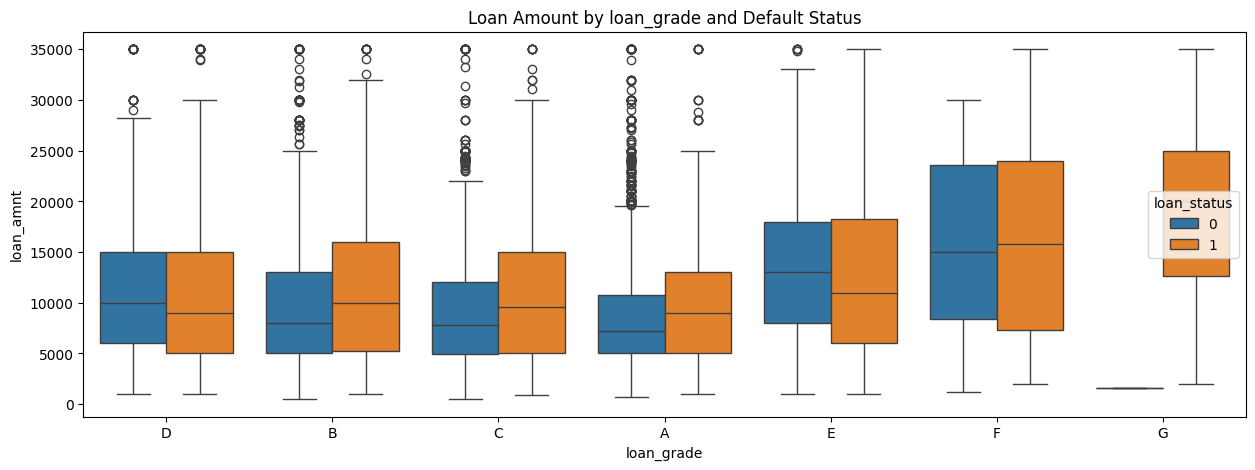

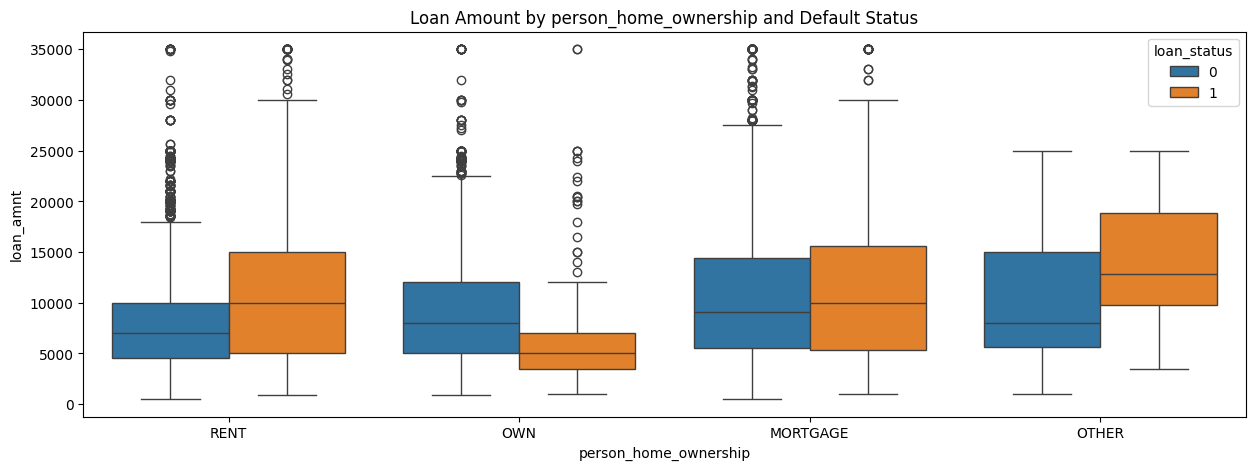

In [27]:
# For key categorical variables, analyze numerical features by category
for cat in ["loan_grade", "person_home_ownership"]:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=cat, y="loan_amnt", hue="loan_status", data=df)
    plt.title(f"Loan Amount by {cat} and Default Status")
    plt.show()

# Data Preprocessing
Remove outliers in person age and employment length. no shot they are employed for 100 years

In [28]:
df["person_emp_length"] = df["person_emp_length"].clip(upper=45)  # by observation
df["person_age"] = df["person_age"].clip(
    upper=80
)  # by observation, adjust if necessary
print(df.isnull().sum())
df.describe()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.00000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.73029,6.665441e+04,4.784674,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.20651,6.237603e+04,4.051829,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.00000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.00000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.00000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.00000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,80.00000,6.000000e+06,45.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# https://contrib.scikit-learn.org/category_encoders/
# other encoders we can try:
import category_encoders as ce

In [30]:
encoder = ce.OneHotEncoder(
    cols=cat_features,
    return_df=True,
    use_cat_names=True,
)

df = encoder.fit_transform(df)
df

,person_age,person_income,person_home_ownership_RENT,person_home_ownership_OWN,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_emp_length,loan_intent_PERSONAL,loan_intent_EDUCATION,loan_intent_MEDICAL,...,loan_grade_E,loan_grade_F,loan_grade_G,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file_Y,cb_person_default_on_file_N,cb_person_cred_hist_length
0,22,59000,1,0,0,0,45.0,1,0,0,...,0,0,0,35000,16.02,1,0.59,1,0,3
1,21,9600,0,1,0,0,5.0,0,1,0,...,0,0,0,1000,11.14,0,0.10,0,1,2
2,25,9600,0,0,1,0,1.0,0,0,1,...,0,0,0,5500,12.87,1,0.57,0,1,3
3,23,65500,1,0,0,0,4.0,0,0,1,...,0,0,0,35000,15.23,1,0.53,0,1,2
4,24,54400,1,0,0,0,8.0,0,0,1,...,0,0,0,35000,14.27,1,0.55,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,0,1,0,1.0,1,0,0,...,0,0,0,5800,13.16,0,0.11,0,1,30
32577,54,120000,0,0,1,0,4.0,1,0,0,...,0,0,0,17625,7.49,0,0.15,0,1,19
32578,65,76000,1,0,0,0,3.0,0,0,0,...,0,0,0,35000,10.99,1,0.46,0,1,28
32579,56,150000,0,0,1,0,5.0,1,0,0,...,0,0,0,15000,11.48,0,0.10,0,1,26


In [31]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1015
)